In [1]:
import tldextract

from pymongo import MongoClient

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_links_set(db):
    links = set()

    for l in db.links.find():
        links.update(l['links'])

    return links
    

In [3]:
client = MongoClient()
db = client.ir_project

links_list = get_links_set(db)

In [4]:
domains = [tldextract.extract(url).domain for url in links_list]
d_counter = Counter(domains)

top_domains = d_counter.most_common()[:25]

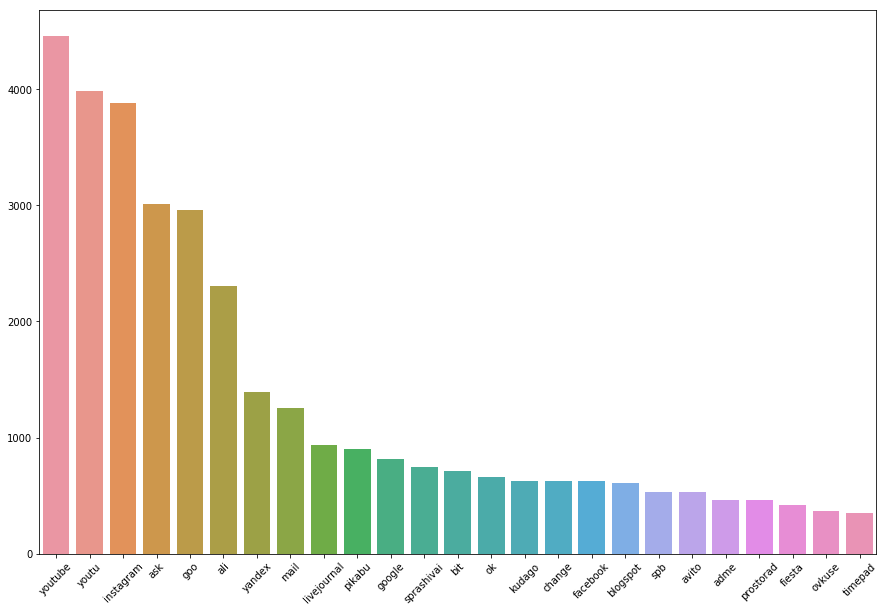

In [5]:
plt.figure(figsize=(15,10))
sns.barplot([d[0] for d in top_domains], [d[1] for d in top_domains])
_ = plt.xticks(rotation=45)